In [1]:
from algos.preprocessing.stack_frame import preprocess_frame, stack_frame


def stack_frames(frames, state, is_new=False):
    frame = preprocess_frame(state, (1, -1, -1, 1), 84)
    frames = stack_frame(frames, frame, is_new)

    return frames

In [2]:
import numpy as np

# Загрузка файла
data = np.load('E:\GitHub\RL-Sonic-Hedgehog\cgames\\05_sonic\checkpoints\ddqn\scores\scores_dqn1900.npy')

# топ 10
top_10 = np.partition(data, -10)[-10:]
# индексы топа 10
top_10_index = np.argpartition(data, -10)[-10:]

# Создаем словарь
top_dict = {index: value for index, value in zip(top_10_index, top_10)}

# Сортируем словарь по значениям
sorted_dict = dict(sorted(top_dict.items(), key=lambda item: item[1], reverse=True))

In [3]:
sorted_dict

{256: 5179.173696637154,
 196: 5141.231033504009,
 139: 5123.208258569241,
 322: 5038.78582572937,
 305: 4238.195612728596,
 1654: 3618.781612098217,
 240: 2827.6770758628845,
 270: 2827.6770757436752,
 315: 2827.6770756840706,
 164: 2827.6770752072334}

In [4]:
data[256]

5179.173696637154

## Step 10: Watch a Smart Agent!

In [5]:
import retro

In [6]:
import torch

# if gpu is to be used
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ", device)

Device:  cpu


In [7]:
env = retro.make(game='SonicTheHedgehog-Genesis', state='LabyrinthZone.Act1', scenario='contest')
env.seed(0)

[0, 592379725]

In [8]:
possible_actions = {
    # No Operation
    0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    # Left
    1: [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    # Right
    2: [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
    # Left, Down
    3: [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    # Right, Down
    4: [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
    # Down
    5: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # Down, B
    6: [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    # B
    7: [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}

In [9]:
from algos.models import DDQNCnn
from algos.agents import DDQNAgent

INPUT_SHAPE = (4, 84, 84)
ACTION_SIZE = len(possible_actions)
SEED = 0
GAMMA = 0.99           # discount factor
BUFFER_SIZE = 100000   # replay buffer size
BATCH_SIZE = 32        # Update batch size
LR = 0.0001            # learning rate 
TAU = 1e-3             # for soft update of target parameters
UPDATE_EVERY = 100     # how often to update the network
UPDATE_TARGET = 10000  # After which thershold replay to be started 
EPS_START = 0.99       # starting value of epsilon
EPS_END = 0.01         # Ending value of epsilon
EPS_DECAY = 100         # Rate by which epsilon to be decayed

agent = DDQNAgent(INPUT_SHAPE, ACTION_SIZE, SEED, device, BUFFER_SIZE, BATCH_SIZE, GAMMA, LR, TAU, UPDATE_EVERY, UPDATE_TARGET, DDQNCnn)

In [10]:
# Загружаем веса в сети политики и цели
agent.policy_net.load_state_dict(torch.load('./checkpoints/ddqn/policy_model/checkpoint_dqn_5000.pth'))
agent.target_net.load_state_dict(torch.load('./checkpoints/ddqn/target_model/checkpoint_dqn_5000.pth'))

<All keys matched successfully>

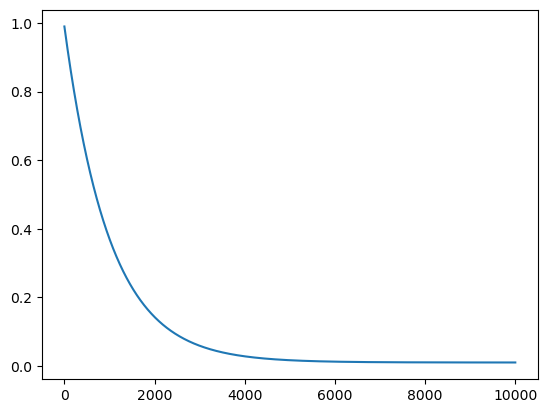

In [11]:
import math
from matplotlib import pyplot as plt
EPS_START = 0.99       # starting value of epsilon
EPS_END = 0.01         # Ending value of epsilon
EPS_DECAY = 1000
epsilon_by_epsiode = lambda frame_idx: EPS_END + (EPS_START - EPS_END) * math.exp(-1. * frame_idx /EPS_DECAY)

plt.plot([epsilon_by_epsiode(i) for i in range(10000)])

In [12]:
import time

env.viewer = None
# watch an untrained agent
state = stack_frames(None, env.reset(), True)
# for j in range(100000):
while True:
    time.sleep(0.001)
    env.render(close=False)
    action = agent.act(state, eps=epsilon_by_epsiode(5000))
    next_state, reward, done, _ = env.step(possible_actions[action])
    state = stack_frames(state, next_state, False)
    if done:
        env.reset()
        break
env.render(close=True)

In [13]:
epsilon_by_epsiode(5000)

0.016603188059103758

In [14]:
# import time
# import retro
# 
# movie = retro.Movie('./record/SonicTheHedgehog-Genesis-GreenHillZone.Act1-000139.bk2')
# movie.step()
# 
# env = retro.make(
#     game=movie.get_game(),
#     state='GreenHillZone.Act1',
#     use_restricted_actions=retro.Actions.ALL,
#     players=movie.players,
# )
# env.initial_state = movie.get_state()
# env.reset()
# env.viewer = None
# state = stack_frames(None, env.reset(), True)
# 
# while movie.step():
#     time.sleep(0.001)
#     env.render(close=False)
# 
#     keys = []
#     for p in range(movie.players):
#         for i in range(env.num_buttons):
#             keys.append(movie.get_key(i, p))
#     next_state, reward, done, _ = env.step(keys)
#     state = stack_frames(state, next_state, False)
#     if done:
#         env.reset()
#         break
# env.render(close=True)
# env.close()